## Machine Learning Online Class

  Exercise 7 | Principle Component Analysis and K-Means Clustering

  Instructions
  ------------

  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     pca.m
     projectData.m
     recoverData.m
     computeCentroids.m
     findClosestCentroids.m
     kMeansInitCentroids.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.


In [1]:
## Initialization
import numpy as np;
import scipy.io as sio;
from scipy.optimize import minimize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### ================= Part 1: Find Closest Centroids ====================

In [2]:
#  To help you implement K-Means, we have divided the learning algorithm 
#  into two functions -- findClosestCentroids and computeCentroids. In this
#  part, you should complete the code in the findClosestCentroids function. 
#
print('Finding closest centroids.\n\n');

# Load an example dataset that we will be using
print('Loading Data ...');

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
mat_contents = sio.loadmat('ex7data2.mat');
print('   ...Done.')
print('\nContents of mat file...')
print(mat_contents.keys())
X = mat_contents['X'];

# m = Number of examples
m = np.shape(X)[0];
print('\n')
print('Dimensions of X: {0}'.format(X.shape));

Finding closest centroids.


Loading Data ...
   ...Done.

Contents of mat file...
dict_keys(['__header__', '__version__', '__globals__', 'X'])


Dimensions of X: (300, 2)


In [3]:
def findClosestCentroids(X, centroids):
    #FINDCLOSESTCENTROIDS computes the centroid memberships for every example
    #   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
    #   in idx for a dataset X where each row is a single example. idx = m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    #

    # Set K
    K = np.shape(centroids)[0];
    m = np.shape(X)[0];
    # You need to return the following variables correctly.
    idx = np.vstack(np.zeros((m,1)));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every example, find its closest centroid, and store
    #               the index inside idx at the appropriate location.
    #               Concretely, idx(i) should contain the index of the centroid
    #               closest to example i. Hence, it should be a value in the 
    #               range 1..K
    #
    # Note: You can use a for-loop over the examples to compute this.
    #

    distVar = np.array([]);
    for i in np.arange(K):
        inner = np.sum((X - np.repeat(centroids[i,:].reshape(1,-1), m, axis=0))**2, axis=1).reshape(-1,1)
        if i == 0:
            distVar = inner;
        else:
            distVar = np.concatenate((distVar, inner), axis=1);
    
    #print(distVar)
    idx = np.argmin(distVar, axis=1);
    return idx;

In [4]:
# Select an initial set of centroids
K = 3; # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]);

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids);

print('\nClosest centroids for the first 3 examples:')
for i in np.arange(3):
    print(' {0} '.format(idx[i]), end='');
print('\n(the closest centroids should be 0, 2, 1 respectively)\n');


Closest centroids for the first 3 examples:
 0  2  1 
(the closest centroids should be 0, 2, 1 respectively)



#### ===================== Part 2: Compute Means =========================

In [5]:
def computeCentroids(X, idx, K):
    #COMPUTECENTROIDS returns the new centroids by computing the means of the 
    #data points assigned to each centroid.
    #   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
    #   computing the means of the data points assigned to each centroid. It is
    #   given a dataset X where each row is a single data point, a vector
    #   idx of centroid assignments (i.e. each entry in range [1..K]) for each
    #   example, and K, the number of centroids. You should return a matrix
    #   centroids, where each row of centroids is the mean of the data points
    #   assigned to it.
    #

    # Useful variables
    [m, n] = np.shape(X);

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every centroid and compute mean of all points that
    #               belong to it. Concretely, the row vector centroids(i, :)
    #               should contain the mean of the data points assigned to
    #               centroid i.
    #
    # Note: You can use a for-loop over the centroids to compute this.
    #

    for i in np.arange(K):
        centroids[i,:] = np.mean(X[idx == i,:], axis=0);
    return centroids;

In [6]:
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.
#
print('\nComputing centroids means.\n');

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

print('Centroids computed after initial finding of closest centroids: ')
for i in np.arange(centroids.shape[0]):
    print('\t[ {0:0.6f} {1:0.6f} ]'.format(centroids[i,0], centroids[i,1]));
print('\nThe centroids should be:');
print('\t[ 2.428301 3.157924 ]');
print('\t[ 5.813503 2.633656 ]');
print('\t[ 7.119387 3.616684 ]');


Computing centroids means.

Centroids computed after initial finding of closest centroids: 
	[ 2.428301 3.157924 ]
	[ 5.813503 2.633656 ]
	[ 7.119387 3.616684 ]

The centroids should be:
	[ 2.428301 3.157924 ]
	[ 5.813503 2.633656 ]
	[ 7.119387 3.616684 ]


#### =================== Part 3: K-Means Clustering ======================

In [7]:
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided. 
#
print('\nRunning K-Means clustering on example dataset.\n\n');

# Load an example dataset
print('Loading Data ...');

# You will have X, y, Xval, yval, Xtest, ytest in your environment
mat_contents = sio.loadmat('ex7data2.mat');
print('   ...Done.')
print('\nContents of mat file...')
print(mat_contents.keys())
X = mat_contents['X'];

# m = Number of examples
m = np.shape(X)[0];
print('\n')
print('Dimensions of X: {0}'.format(X.shape));


Running K-Means clustering on example dataset.


Loading Data ...
   ...Done.

Contents of mat file...
dict_keys(['__header__', '__version__', '__globals__', 'X'])


Dimensions of X: (300, 2)


In [8]:
from bqplot import *
import bqplot
from IPython.display import display

def plotDataPoints_bq(X, idx, K, centroids, centroids_history):
    
    xs = LinearScale();
    ys = LinearScale();
    cs = OrdinalColorScale(colors = bqplot.CATEGORY10)
    sc_col = ColorScale(colors=['white', 'black'], min=0.0, max=1.0, mid=0.5, dtype=float)
    
    scatt = Scatter(x=X[:,0], y=X[:,1], color=idx.reshape(1,-1), scales={'x': xs, 'y': ys, 'color': cs});
    xax = Axis(scale=xs, label='x', tick_format='0.1f', grid_lines='solid');
    yax = Axis(scale=ys, orientation='vertical', tick_format='0.1f', label='y', grid_lines='solid');

    marks=[scatt];
        
    for i in np.arange(np.shape(centroids_history)[0]):
        line = FlexLine(x=centroids_history[i,0,:].flatten(), y=centroids_history[i,1,:].flatten(),
                     scales={'x': xs, 'y': ys, 'color': sc_col}, 
                     color=np.ones(np.shape(centroids_history)[2]).flatten(),
                     stroke_width=1.5)
        marks.append(line)        
    
    for i in np.arange(np.shape(centroids)[0]):
        marker = Scatter(x=centroids[i,0].reshape(1,), y=centroids[i,1].reshape(1,), 
                         scales={'x': xs, 'y': ys}, 
                         colors=['black'], marker='cross')
        marks.append(marker)
    
    return Figure(marks=marks, axes=[xax, yax], animation_duration=1000);


In [9]:
%matplotlib notebook
import sys
import time

def runkMeans(X, initial_centroids, max_iters, plot_progress):
    #RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
    #is a single example
    #   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
    #   plot_progress) runs the K-Means algorithm on data matrix X, where each 
    #   row of X is a single example. It uses initial_centroids used as the
    #   initial centroids. max_iters specifies the total number of interactions 
    #   of K-Means to execute. plot_progress is a true/false flag that 
    #   indicates if the function should also plot its progress as the 
    #   learning happens. This is set to false by default. runkMeans returns 
    #   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    #

    # Initialize values
    [m, n] = np.shape(X);
    K = np.shape(initial_centroids)[0];
    centroids = initial_centroids;
    centroids_history = np.dstack([centroids]*(max_iters+1))
        
    idx = np.zeros((m, 1));
    
    for i in np.arange(max_iters):
       
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids);

        # Optionally, plot progress here
        if plot_progress:
            if i == 0:
                fig = plotDataPoints_bq(X, idx, K, centroids, centroids_history);
                display(fig);
                time.sleep(1.0);
            else:
                fig.marks[0].x = X[:,0]
                fig.marks[0].y = X[:,1]
                fig.marks[0].color = idx
                for j in np.arange(np.shape(centroids)[0]):
                    fig.marks[j+1+K].x = centroids[j,0].reshape(1,);
                    fig.marks[j+1+K].y = centroids[j,1].reshape(1,);
                time.sleep(1.0);
                for j in np.arange(np.shape(centroids)[0]): 
                    fig.marks[j+1].x = centroids_history[j,0,:].flatten();
                    fig.marks[j+1].y = centroids_history[j,1,:].flatten();
                    fig.marks[j+1].color = np.hstack((np.linspace(0.3, 0.9, num=i),np.ones((max_iters - i + 1)))).flatten();                  
                    
        # Output progress
        sys.stdout.write('\r')
        sys.stdout.write("K-Means iteration {0:d}/{1:d}...".format(i+1, max_iters));
        sys.stdout.flush()
        
        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K);
        centroids_history[:,:,i+1:] = np.dstack([centroids]*(max_iters-i));
        
    return centroids, idx

In [10]:
# Settings for running K-Means
K = 3;
max_iters = 10;

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]], dtype=float);

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, True);
print('\nK-Means Done.\n\n');

A Jupyter Widget

K-Means iteration 10/10...
K-Means Done.




#### ============= Part 4: K-Means Clustering on Pixels ===============
  In this exercise, you will use K-Means to compress an image. To do this,
  you will first run K-Means on the colors of the pixels in the image and
  then you will map each pixel onto its closest centroid.
  
  You should now complete the code in kMeansInitCentroids.m

In [11]:
def kMeansInitCentroids(X, K):
    #KMEANSINITCENTROIDS This function initializes K centroids that ar$
    #used in K-Means on the dataset X
    #   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centro$
    #   used with the K-Means on the dataset X
    #

    # You should return this values correctly
    centroids = np.zeros((K, np.shape(X)[0]));

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should set centroids to randomly chosen exampl$
    #               the dataset X
    #

    #Initialize the centroids to be random examples
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(np.shape(X)[0]);
    #Take the first K examples as centroids
    centroids = X[randidx[:K], :];

    return centroids



In [12]:
from scipy import misc
  
print('\nRunning K-Means clustering on pixels from an image.\n\n');

#  Load an image of a bird
#A = double(imread('bird_small.png'));
A = misc.imread('bird_small.png')
print('Image shape: ', A.shape)
print('Image data type: ', A.dtype)
    
# If imread does not work for you, you can try instead
#   load ('bird_small.mat');

A = A / 255; # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = np.shape(A);

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0] * img_size[1], 3));

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

# Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, plot_progress=False);


Running K-Means clustering on pixels from an image.


Image shape:  (128, 128, 3)
Image data type:  uint8
K-Means iteration 10/10...

#### ================= Part 5: Image Compression ======================
  In this part of the exercise, you will use the clusters of K-Means to
  compress an image. To do this, we first find the closest clusters for
  each example. After that, we 


Applying K-Means to compress an image.

Original Image Size (bytes): 393216
Compressed Image Size - Indices (bytes): 131072
Compressed Image Size - Centroids (bytes): 384


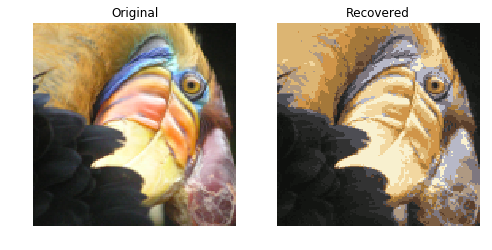

In [13]:
%matplotlib inline
print('\nApplying K-Means to compress an image.\n');

# Find closest cluster members
idx = findClosestCentroids(X, centroids);

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
X_recovered = centroids[idx,:];

# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], 3));

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# display the original image
fig.add_subplot(1, 2, 1)
plt.imshow(np.flip(A, axis=0), origin=[-1,1]);
plt.title('Original')
# Do not show axis
plt.axis('off');

# display the recovered image
fig.add_subplot(1, 2, 2)
plt.imshow(np.flip(X_recovered, axis=0), origin=[-1,1]);
plt.title('Recovered')
# Do not show axis
plt.axis('off');

print('Original Image Size (bytes): {0:d}'.format(A.nbytes))
print('Compressed Image Size - Indices (bytes): {0:d}'.format(idx.nbytes))
print('Compressed Image Size - Centroids (bytes): {0:d}'.format(centroids.nbytes))